# **Employee Retenation Project**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\DataScientist\Projects\Machine Learning\Employee\Dataset\emp.csv")
df.head()

,Satisfaction_level,Last_evaluation,number_project,average_montly_hours,time_spend_company,Wor_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Satisfaction_level     14999 non-null  float64
 1   Last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Wor_accident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Satisfaction_level,Last_evaluation,number_project,average_montly_hours,time_spend_company,Wor_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['Satisfaction_level', 'Last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Wor_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df=df.rename(columns={"Satisfaction_level":"satisfaction_level","Last_evaluation":"last_evaluation","average_montly_hours":"average_monthly_hours","Wor_accident":"work_accident"})

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
df.duplicated().sum()

3008

In [11]:
df=df.drop_duplicates(keep="first")

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


<Axes: title={'center': 'Detecting outliers'}, xlabel='time_spend_company'>

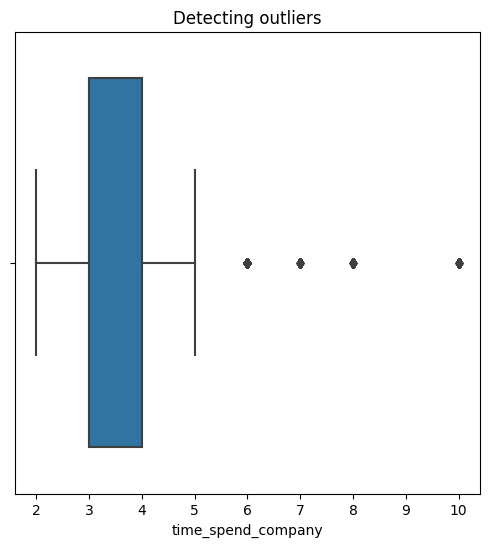

In [15]:
plt.figure(figsize=(6,6))
plt.title("Detecting outliers",fontsize=12)
sns.boxplot(x=df['time_spend_company'])

In [16]:
p_25=df["time_spend_company"].quantile(0.25)
p_75=df["time_spend_company"].quantile(0.75)
iqr=p_75-p_25
upper_threshold=p_75+(1.5*iqr)
lower_threshold=p_25-(1.5*iqr)
upper_threshold,lower_threshold

(5.5, 1.5)

In [17]:
df['time_spend_company'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64